In [5]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

plt.rcParams["font.sans-serif"] = ["Songti SC"]
plt.rcParams["axes.unicode_minus"] = False

color_list = [
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
    "#1f77b4",
    "#ff7f0e",
    "#2ca02c",
    "#d62728",
    "#9467bd",
    "#8c564b",
    "#e377c2",
    "#7f7f7f",
    "#bcbd22",
    "#17becf",
]

def validate_data(label_data, labels):
    if not isinstance(label_data, dict):
        raise TypeError("label_data must be a dictionary.")
    for key, values in label_data.items():
        if not isinstance(values, (list, tuple)):
            raise TypeError(f"Values for {key} must be a list or tuple.")
        if len(values) != len(labels):
            raise ValueError(
                f"Length of values for {key} does not match labels length."
            )

def prepare_data(labels, label_data):
    df = pd.DataFrame(label_data).melt(var_name="category", value_name="value")
    df["x"] = labels * len(label_data)
    return df

def setup_plot(fig_size, dpi):
    plt.figure(figsize=fig_size, dpi=dpi)
    sns.set_theme(style="whitegrid", font_scale=1.2)
    return plt.gca()

def configure_axes(ax, title, x_label, y_label):
    ax.set_title(title, pad=20, fontsize=14, weight="bold")
    ax.set_xlabel(x_label, labelpad=10, fontsize=12)
    ax.set_ylabel(y_label, labelpad=10, fontsize=12)

def configure_legend(ax, legend_outside, title="Categories", title_fontsize=11, 
                    fontsize=10, frameon=True, framealpha=0.9, edgecolor="0.6"):
    legend = ax.legend(
        title=title,
        title_fontsize=title_fontsize,
        fontsize=fontsize,
        frameon=frameon,
        framealpha=framealpha,
        edgecolor=edgecolor,
    )
    if legend_outside:
        legend.set_bbox_to_anchor((1.05, 1))
        ax.add_artist(legend)
    return legend

def set_y_range(ax, y_range):
    ax.set_ylim(y_range)
    ax.yaxis.set_ticks(np.linspace(y_range[0], y_range[1], 6))

def configure_grid(ax, grid_linestyle, grid_alpha):
    ax.grid(axis="y", linestyle=grid_linestyle, alpha=grid_alpha)

def save_or_show_plot(output_path, dpi):
    plt.tight_layout()
    if output_path:
        plt.savefig(output_path, dpi=dpi, bbox_inches="tight")
    else:
        plt.show()
    plt.close()

def plot_bar(
    labels,
    label_data,
    title,
    x_label,
    y_label,
    output_path=None,
    y_range=(0, 1.0),
    legend_outside=False,
    palette=None,
    fig_size=(10, 6),
    dpi=300,
    grid_linestyle="--",
    grid_alpha=0.6,
):
    validate_data(label_data, labels)
    df = prepare_data(labels, label_data)
    
    ax = setup_plot(fig_size, dpi)
    
    if palette is None:
        palette = color_list[: len(label_data)]
    
    ax = sns.barplot(
        x="x",
        y="value",
        hue="category",
        data=df,
        palette=palette,
        linewidth=0,
    )
    
    configure_axes(ax, title, x_label, y_label)
    
    for container in ax.containers:
        ax.bar_label(
            container,
            fmt="%.2f",
            padding=4,
            color="black",
            fontsize=9,
            rotation=0,
        )
    
    configure_legend(ax, legend_outside)
    
    set_y_range(ax, y_range)
    configure_grid(ax, grid_linestyle, grid_alpha)
    
    save_or_show_plot(output_path, dpi)

def plot_line(
    labels,
    label_data,
    title,
    x_label,
    y_label,
    output_path=None,
    y_range=(0, 1.0),
    legend_outside=False,
    palette=None,
    fig_size=(10, 6),
    dpi=300,
    grid_linestyle="--",
    grid_alpha=0.6,
    line_width=2.0,
    markers=True,
    show_values=True,
    value_format="%.2f",
    value_padding=4,
    value_fontsize=9,
    value_rotation=0,
    legend_title="Categories",
    legend_title_fontsize=11,
    legend_fontsize=10,
    legend_frameon=True,
    legend_framealpha=0.9,
    legend_edgecolor="0.6",
):
    validate_data(label_data, labels)
    df = prepare_data(labels, label_data)
    
    ax = setup_plot(fig_size, dpi)
    
    if palette is None:
        palette = color_list[: len(label_data)]
    
    ax = sns.lineplot(
        x="x",
        y="value",
        hue="category",
        data=df,
        palette=palette,
        markers=markers,
        linewidth=line_width,
    )
    
    configure_axes(ax, title, x_label, y_label)
    
    ax.set_xticks(labels)
    ax.set_xticklabels(labels)
    
    if show_values:
        for i, row in df.iterrows():
            x_val = row['x']
            y_val = row['value']
            formatted_value = value_format % y_val
            ax.text(
                x_val,
                y_val + value_padding/100 * (y_range[1]-y_range[0]),
                formatted_value,
                ha='center',
                va='bottom',
                fontsize=value_fontsize,
                rotation=value_rotation,
                color='black',
            )
    
    configure_legend(ax, legend_outside, legend_title, legend_title_fontsize,
                    legend_fontsize, legend_frameon, legend_framealpha, legend_edgecolor)
    
    set_y_range(ax, y_range)
    configure_grid(ax, grid_linestyle, grid_alpha)
    
    save_or_show_plot(output_path, dpi)

In [6]:
labels = ['Flat32', 'Flat64', 'Flat128']
win_rate_1 = [0.1, 0.8, 0.4]
win_rate_2 = [0.2, 0.9, 0.5]
win_rate_3 = [0.3, 0.7, 0.6]
data = {"A": win_rate_1, "B": win_rate_2, "C": win_rate_3}

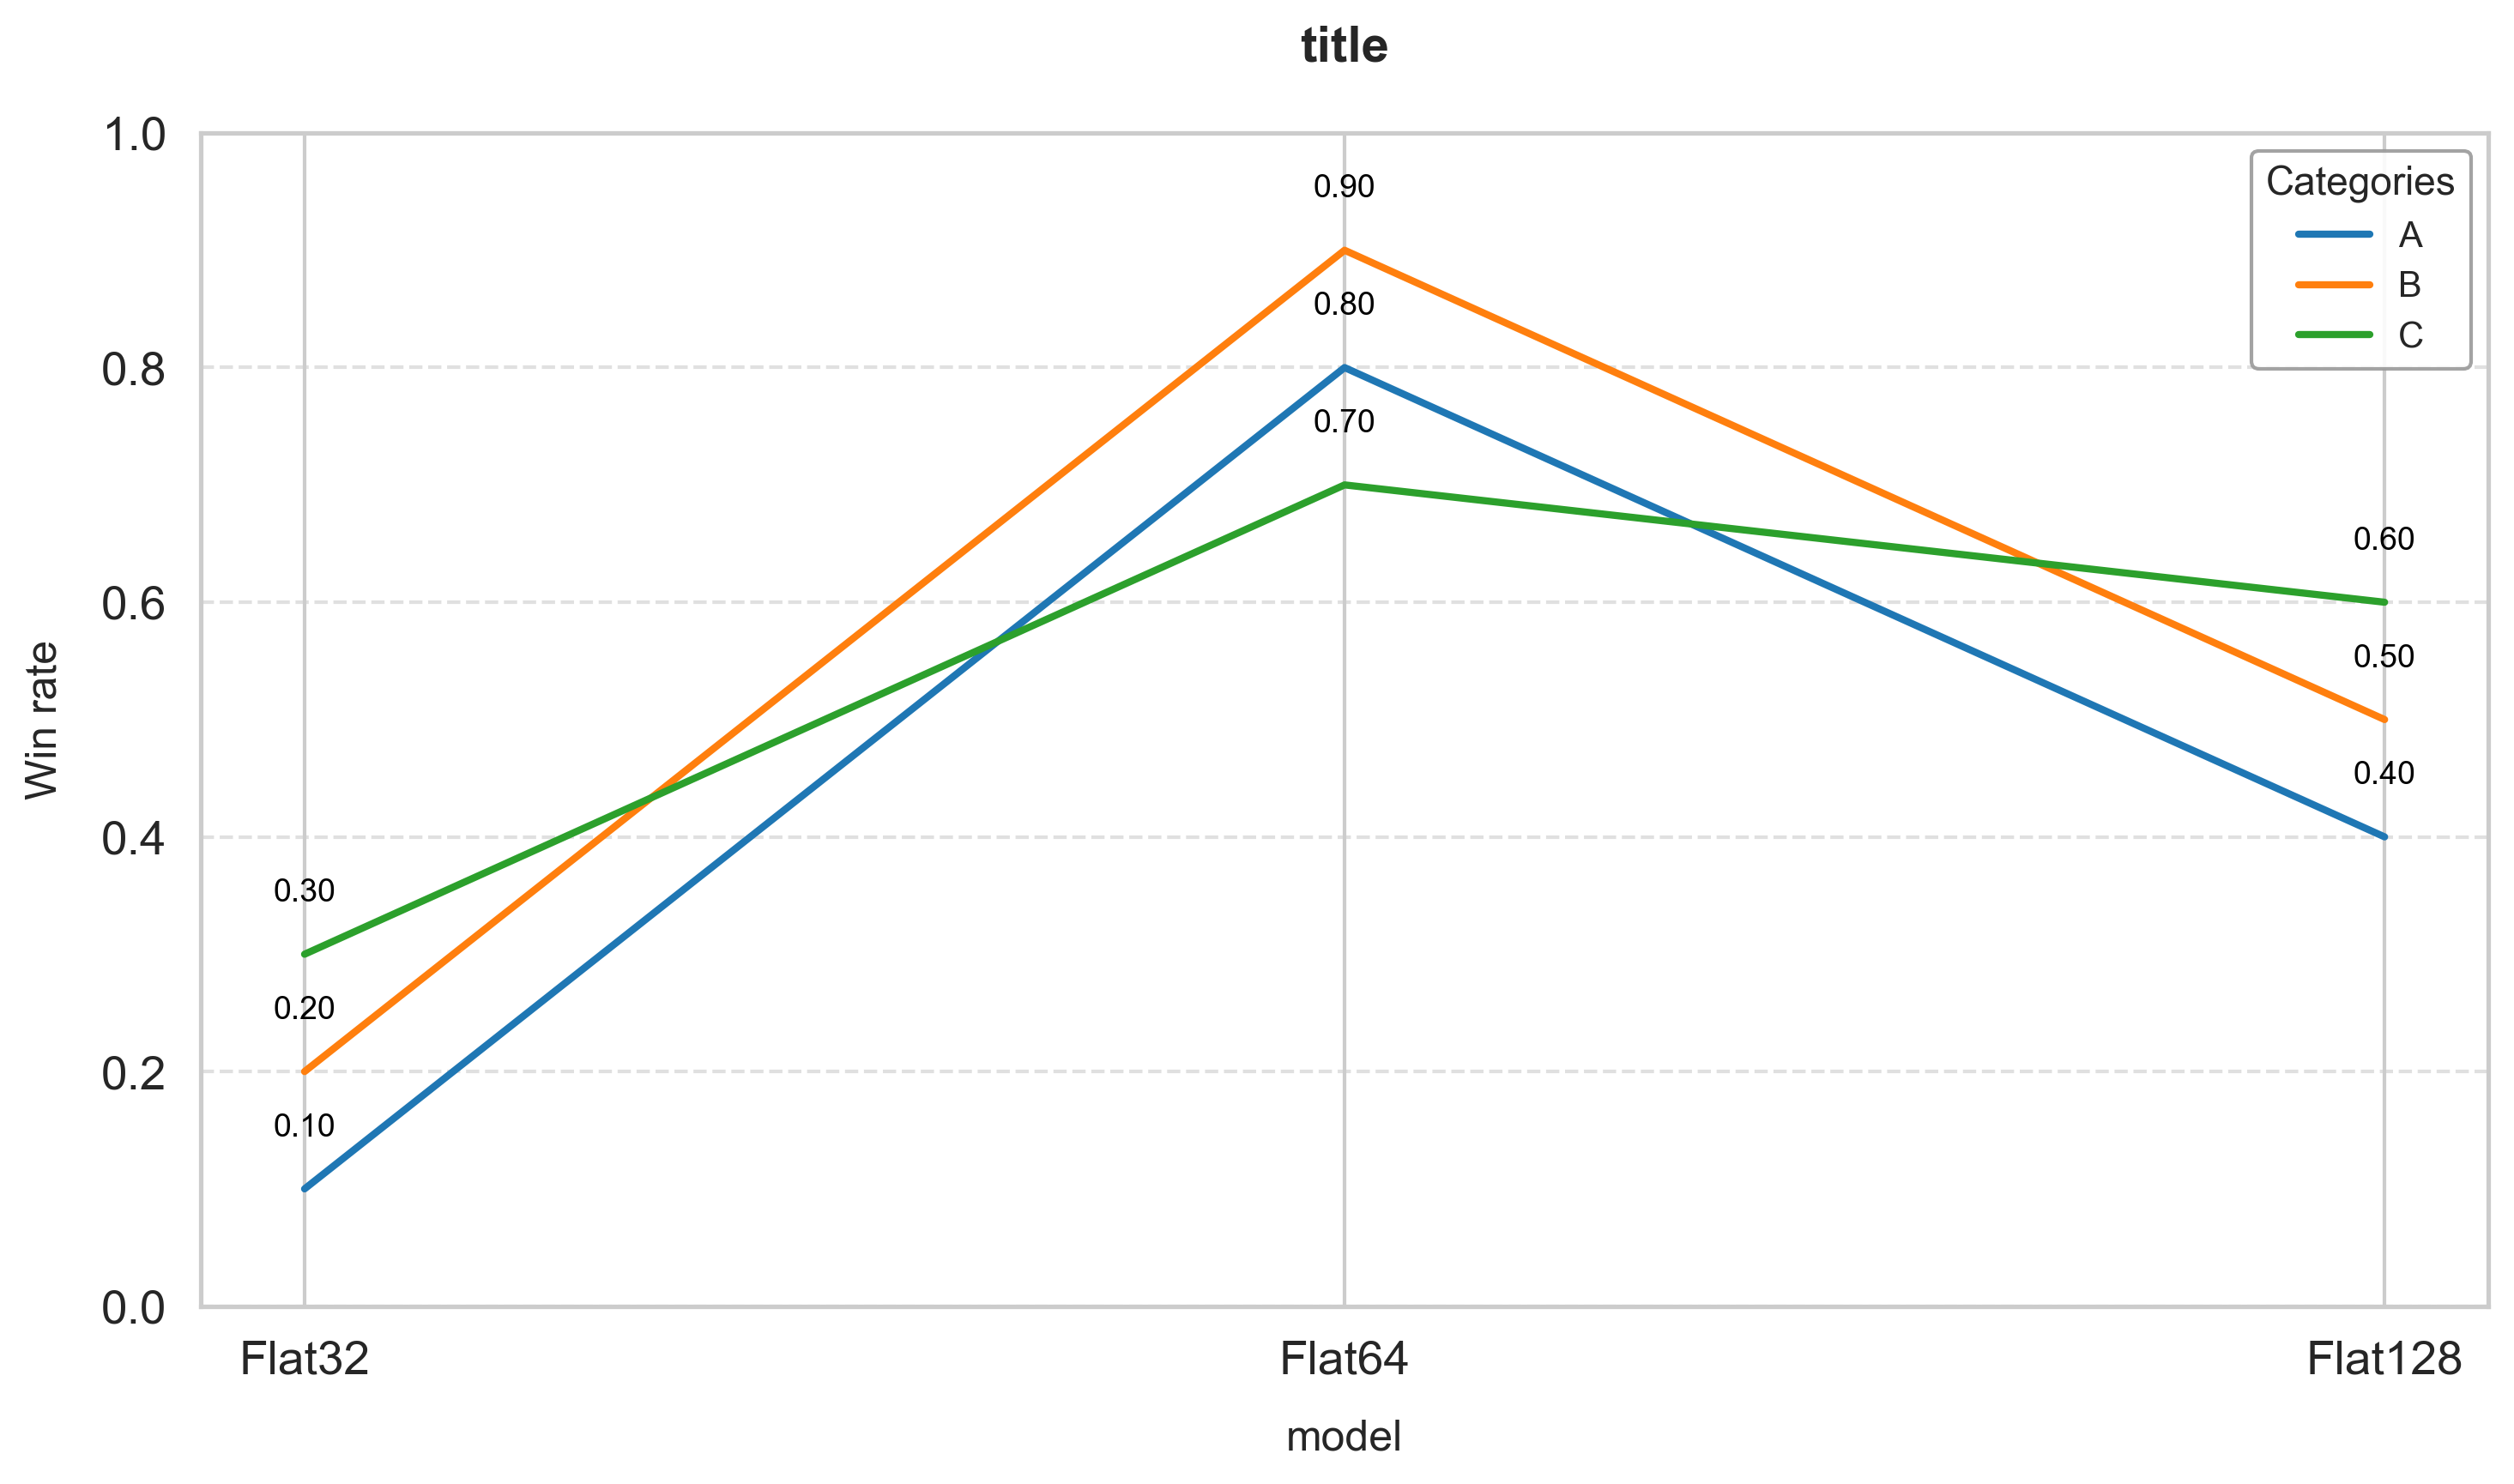

In [7]:
plot_line(
    labels, 
    data, 
    title="title", 
    x_label="model", 
    y_label="Win rate",
)

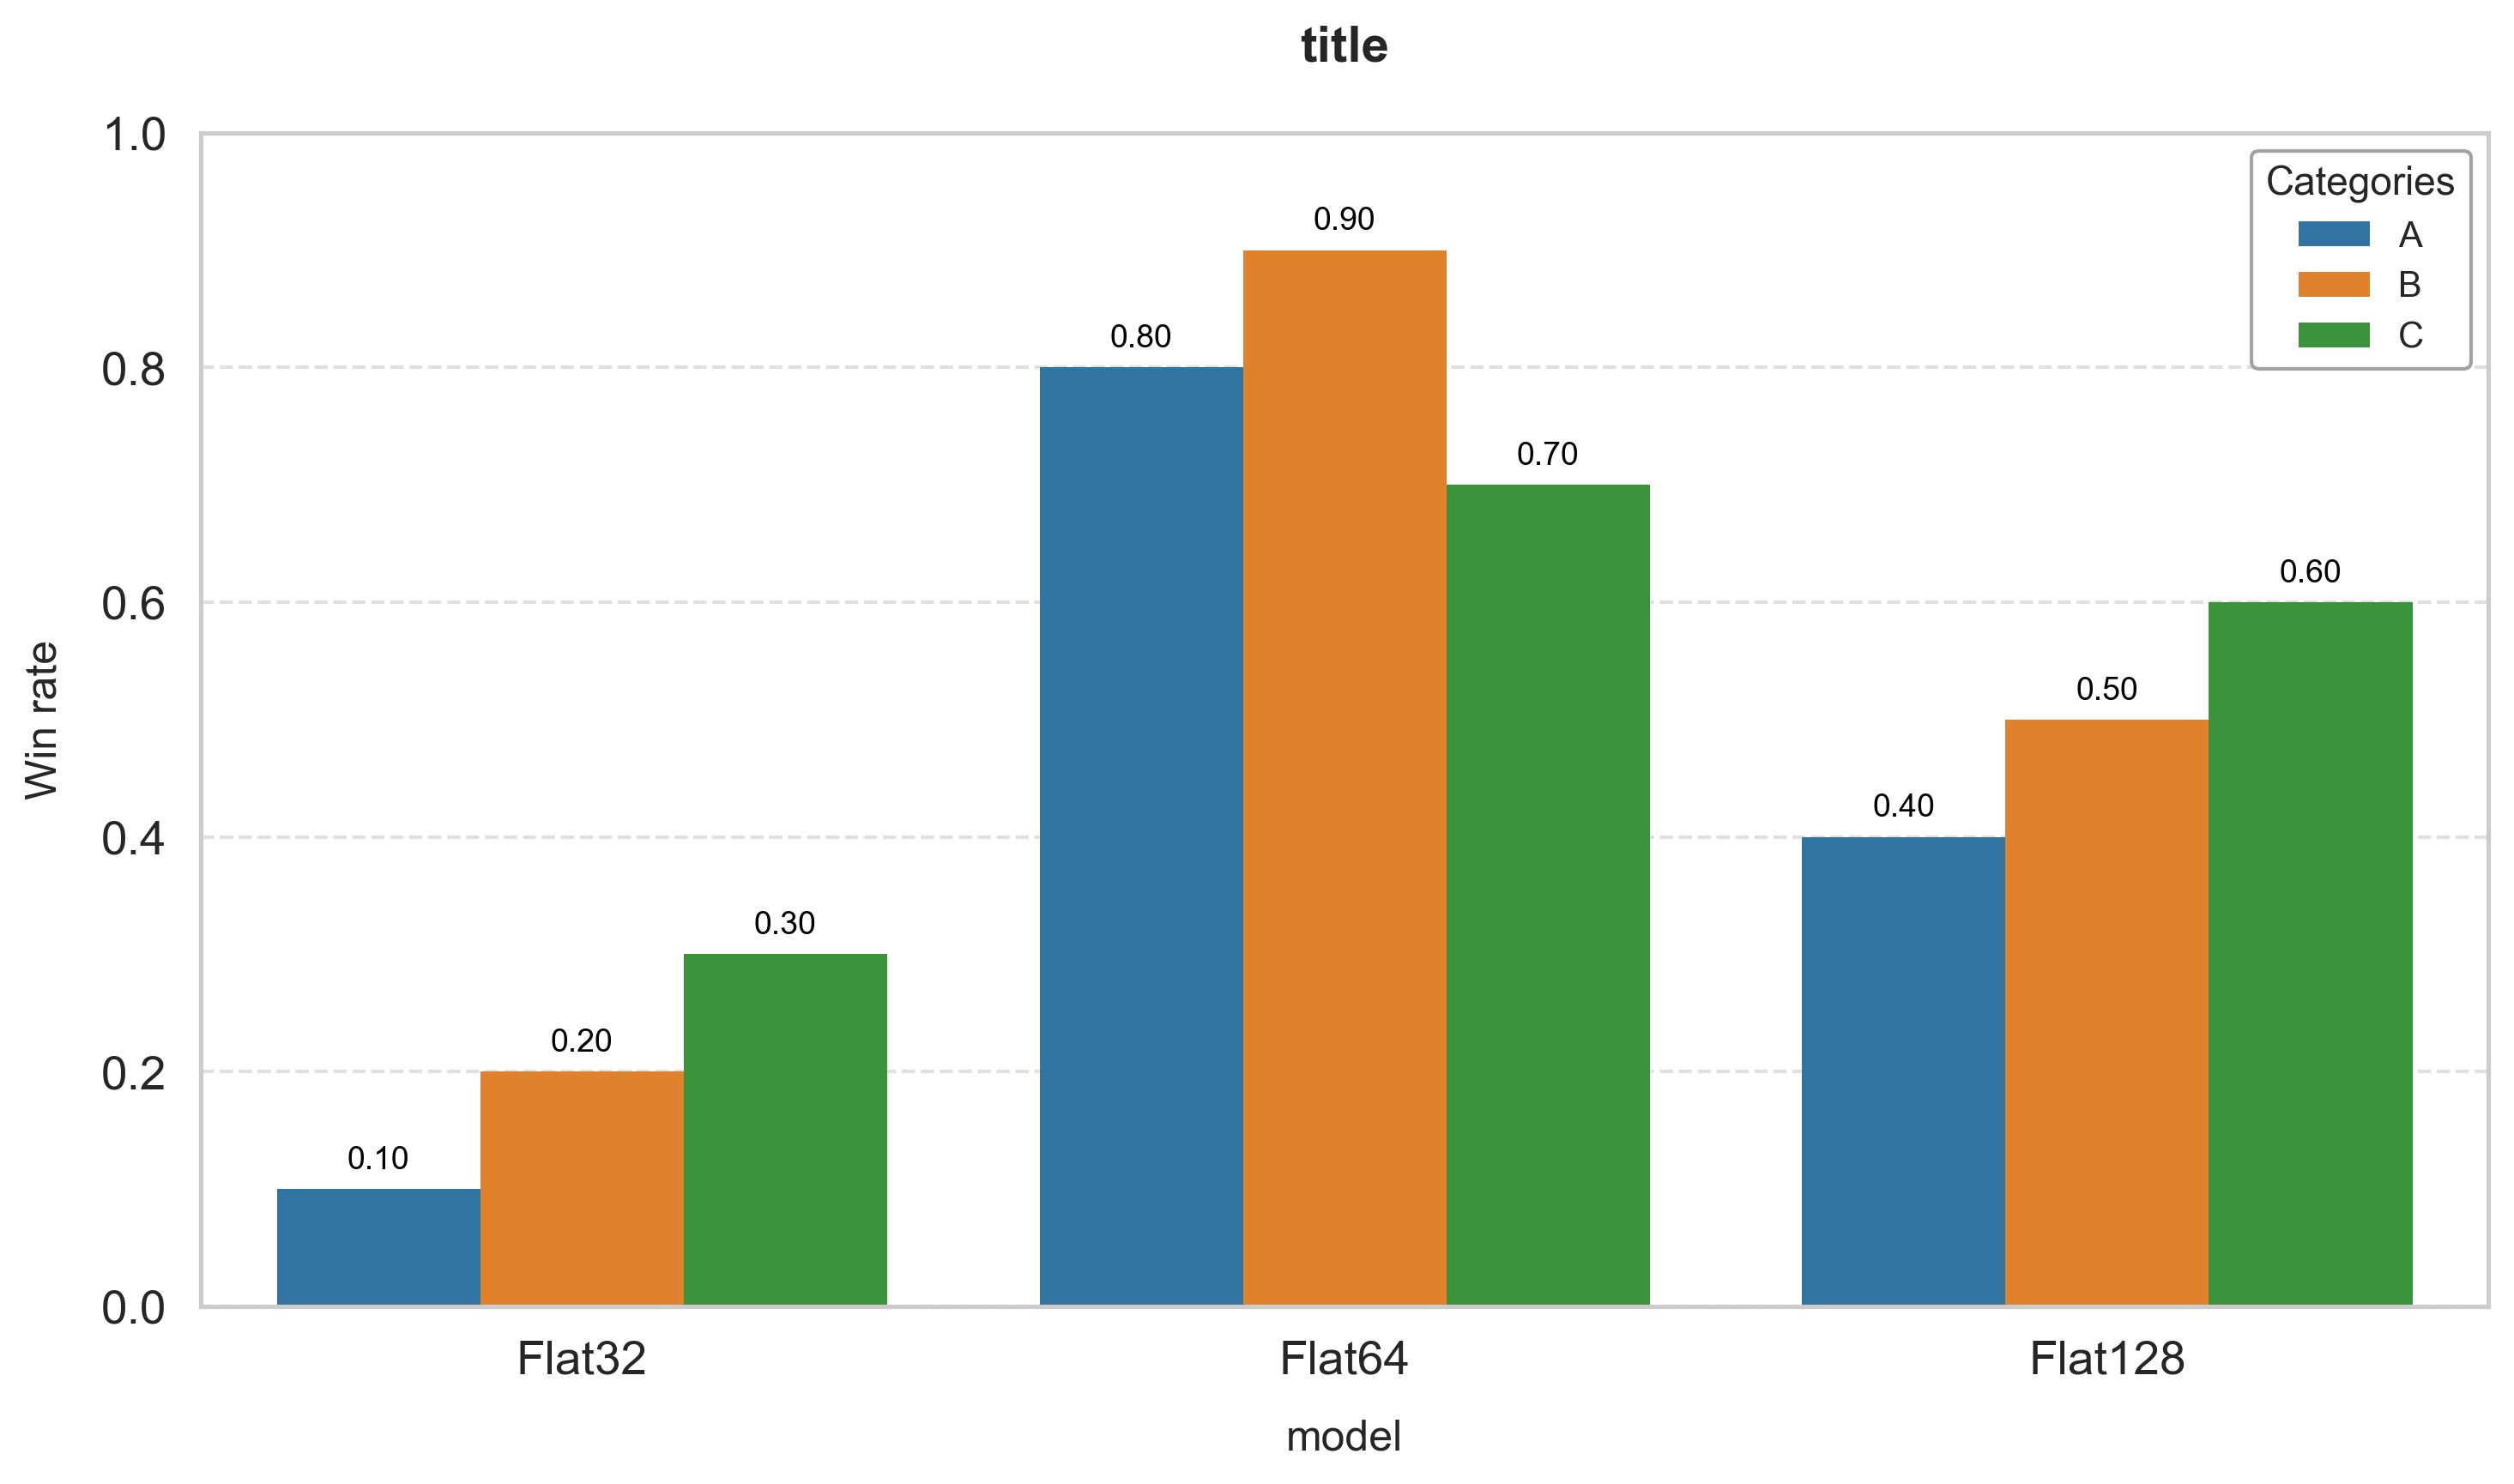

In [8]:
plot_bar(
    labels, 
    data, 
    title="title", 
    x_label="model", 
    y_label="Win rate",
)